# _Análisis del negocio e identificación de componentes del modelo dimensional_

Como consecuencia del proceso de expacion de la empresa AB_NYC se requiere una solución escalable para integrar y analizar grandes volumnes de datos procedentes de fuentes heterogeneas. 

Se han establecido preguntas de negocio como una guía para el análisis:

1. ¿Cuál es el precio promedio de los alojamientos por barrio y distrito?
2. ¿Qué tipo de habitación es el más ofrecido y cuál genera mayor revenue estimado?
3. ¿Cuáles son los anfitriones con más propiedades listadas y cómo varían sus precios?
4. ¿Existen diferencias significativas en la disponibilidad anual entre barrios o tipos de alojamiento?
5. ¿Cómo evoluciona el número de reseñas por mes en los diferentes distritos de la ciudad?
6. ¿Qué barrios tienen la mayor concentración de alojamientos activos?
7. ¿Cómo se distribuyen los precios y qué outliers existen?
8. ¿Qué relación hay entre la disponibilidad anual y la cantidad de reseñas como proxy de ocupación?
9. ¿Qué boroughs presentan mayor Oferta per cápita (100k hab.) y mayor Densidad de oferta (listings/km²)?

Estas preguntas permitiran realizar un analisis con una vision integral del negocio brindando una base sólida para definir KPIs generar insights y establecer metas orientadas al desarrollo continuo.
Con base en estas preguntas, se busca implementar un modelo de datos relacional y dimensional que consolide de manera estructurada la información proveniente de distintas áreas del negocio.


Diseño conceptual: Modelo dimensional


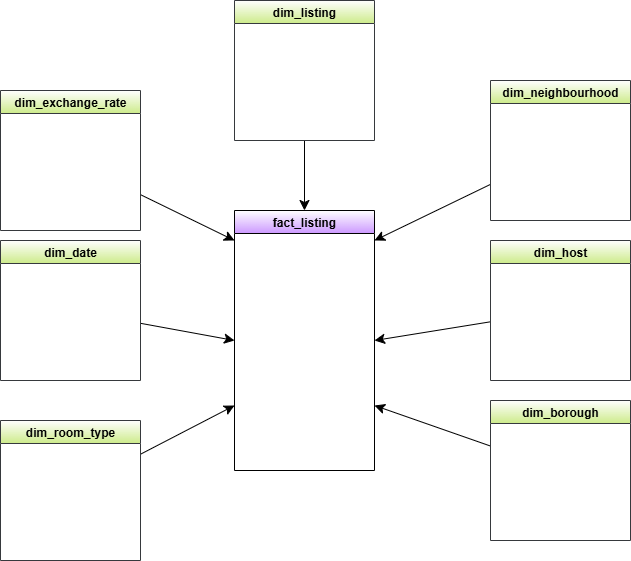

In [7]:
from IPython.display import Image, display
print("Diseño conceptual: Modelo dimensional")

display(Image(filename="images/diseño_conceptual_ab_nyc.drawio.png"))

Diseño lógico: Modelo dimensional


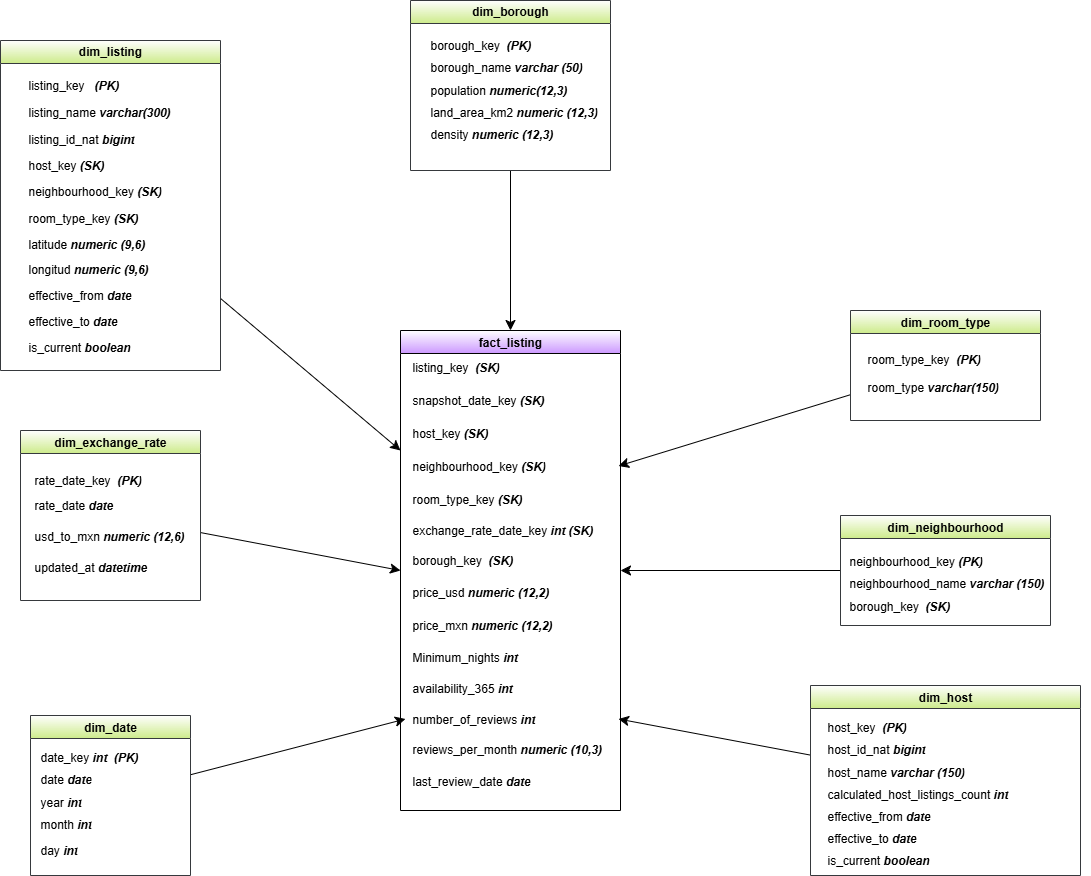

In [4]:
from IPython.display import Image, display
print("Diseño lógico: Modelo dimensional")

display(Image(filename="images/diseño_logico_ab_ncy.drawio.png"))

### Justificación del diseño dimensional 

1. **Granularidad del modelo**

La granularidad es el nivel de detalle que representa la tabla de hechos. En este proyecto la tabla de hechos fact_listing.

En este modelo, la graularidad de la tabla de hechos se define conceptualmente como "una propiedad publicada en un snapshot diario", ya qeu el diseño está preparado para soportar evolución temporal y actualizaciones diarias. 

* Cada fila representa una propiedad publicada(identificada por su surrogate key en listing_key).
* Eta asociada a la fecha del snapshot (snapshot_date_key), lo que indica el día en que los datos fueron cargados.
* Integra además la fecha del tipo de cambio (exchange_rate_date_key), que permite convertir precios de USD a MXN de acuerdo con la tasa oficial de Banxico de ese día.

Sin embargo, dado que el dataset AB_NYC es estático y no incorpora nuevas publicaciones ni cambios diarios, en la práctica el snapshot diario refleja únicamente las actualizaciones de las fuentes externas: tipo de cambio y datos de boroughs obtenidos vía web scraping.
La unica fecha interna del dataset es la de la última reseña registrada en cada propiedad (last_review_date). Esta fecha se incluye como un atributo analítico que permite estudiar la actividad de reseñas, pero no se usa como driver de snapshots.

2. **Slowly Changing Dimensions** (SCDs)

El diseño contempla la evolución de las dimensiones mediante el uso de Slowly Changing Dimensions (SCDs):

* Dimensiones con tipo **SCD 2 (historico completo)**:

- **dim_listing**: Si una propiedad cambia de barrio, de tipo de habitación o incluso su ubicación, se genera un nuevo registro con vigencia temporal. Esto asegura que los análisis históricos no se vean distorsionados.

- **dim_host**: Los cambios en el nombre del anfitrión o en la cantidad de propiedades publicadas también se registran con histórico.

* Dimensiones con tipo **SCD 1 (sobreescribir cambios)**:

- **dim_neighbourhood** y **dim_borough**: Son jerarquías geográficas que cambian muy rara vez, por lo que sobrescribir el valor es suficiente.

- **dim_room_type**: Catálogo estable de tipos de habitación, sobreescribit el valor es suficiente.

**dim_date** y **dim_exchange_rate**: No aplican SCD ya que cada fecha y tipo de cambio son únicos
